# Going through the data

## Importing libraries and datasets

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

### Datasets

#### df_bom (bom.movie_gross.csv)
- title and domestic/foreign gross revenues
- 3387 titles from 2010 to 2018

#### df_imdb_name (imdb.name.basics.csv)
- database of professionals: ID, name, birth/death years, profession, and max four known titles
- 606638 names

#### df_imdb_akas (imdb.title.akas.csv)
- database of international versions: movie ID, titles in different languages, region, and languages
- 331703 versions

#### df_imdb_basics (imdb.title.basics.csv)
- basic information by title: movie ID, primary/original titles, year, length, and genres
- 146144 IDs (136071 unique primary titles)

#### df_imdb_crew (imdb.title.crew.csv)
- directors/writers by movie
- 146144 movies

#### df_imdb_principals
- movies-professionals database: movie ID, professional ID, category (actor/actoress, director etc), and character
- 1028186 roles

#### df_imdb_ratings (imdb.title.ratings.csv)
- rating and voter number by movie
- 73856 movies

#### df_rt_movies (rt.movie_info.tsv)
- movie ID/title, rating, genre, director, writer, release date, box office revenue, length, and studio
- 1560 movies with some null values

#### df_rt_reviews (rt.reviews.tsv.gz)
- critics rating database: movie ID, comments, rating, fresh/rotten, critic name, top critic dummy, publisher, and date
- 54432 reviews of 1135 titles with some null values

#### df_tmdb_movies (tmdb.movies.csv)
- genre, movie ID, language, original title, pupularity score, release date, title, vote rating, vote count
- 26517 movies from 1930 to 2020

#### df_budget (tn.movie_budgets.csv)
- release date. movie title, production budget, domestic/global sales
- 5782 movies from 1915 to 2020      

We use only TMDB and The Numbers data in this notebook

### Importing the datasets

In [2]:
# df_bom = pd.read_csv('data/bom.movie_gross.csv.gz')
# df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz')
# df_imdb_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
# df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
# df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
# df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
# df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
# df_rt_movies = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', parse_dates=['theater_date','dvd_date'])
# df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding = 'unicode_escape', parse_dates=['date'])
df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', parse_dates=['release_date'])
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

### TMDB data needs genre conversion

In [3]:
# data from the website
tmdb_genre_raw = [{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]

In [4]:
# Creating conversion dictionary
tmdb_genre_dict = {}
for element in tmdb_genre_raw:
    tmdb_genre_dict[element['id']] = element['name']
print(tmdb_genre_dict)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


In [5]:
# spliting the genre column
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.str.strip('[]').str.split(',')

In [6]:
# creating dummy variables for each genre
for element in tmdb_genre_dict:
    df_tmdb_movies[tmdb_genre_dict[element]] = 0
    df_tmdb_movies.loc[df_tmdb_movies.genre_ids.apply(lambda x: str(element) in x), tmdb_genre_dict[element]] = 1

### Adding year and month variables to TMDB data

In [7]:
df_tmdb_movies['year'] = df_tmdb_movies.release_date.dt.year
df_tmdb_movies['month'] = df_tmdb_movies.release_date.dt.month

### Subsetting the TMDB data for years 2009-2018

In [8]:
df_tmdb_movies_2009_2018 = df_tmdb_movies[
    (df_tmdb_movies['release_date'].dt.year >= 2009) & (df_tmdb_movies['release_date'].dt.year<=2018)&(df_tmdb_movies.vote_count>=10)&(df_tmdb_movies.original_language=='en')]

### Removing duplicates from TMDB data

In [9]:
df_tmdb_movies_2009_2018 = df_tmdb_movies_2009_2018.drop_duplicates(subset='title')

In [10]:
df_tmdb_movies_2009_2018['log_popularity'] = np.log(df_tmdb_movies_2009_2018.popularity)

### Histgrams of popularity by genre

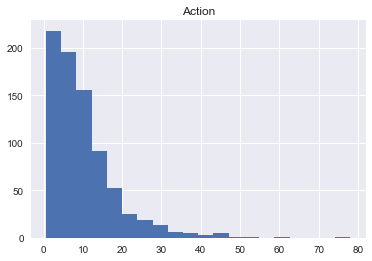

mean
10.073062972292197
std
8.73483097460505


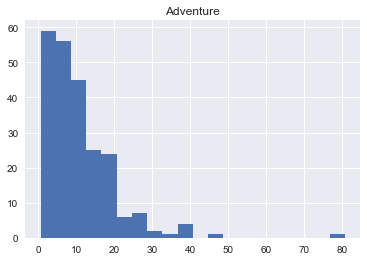

mean
10.877264069264072
std
9.455429435191045


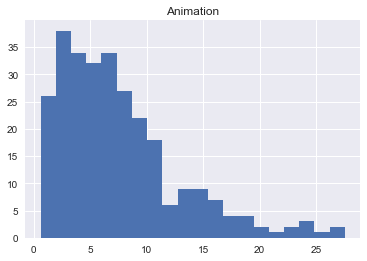

mean
7.539558718861208
std
5.403586116539757


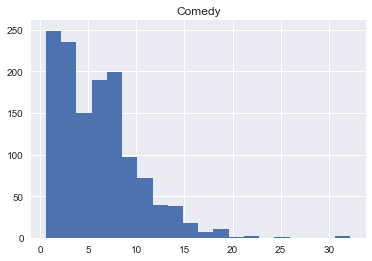

mean
6.067816933638448
std
4.074989745134293


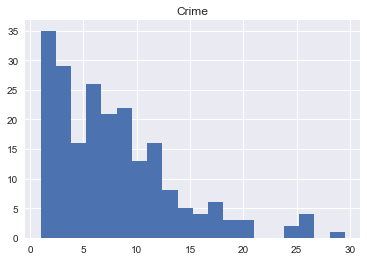

mean
7.919817757009343
std
5.773028533638098


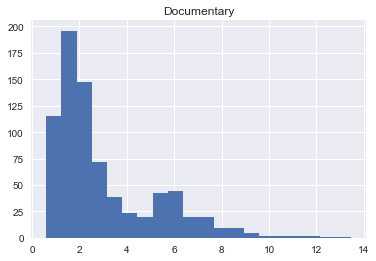

mean
3.0407885862516246
std
2.2300226061807877


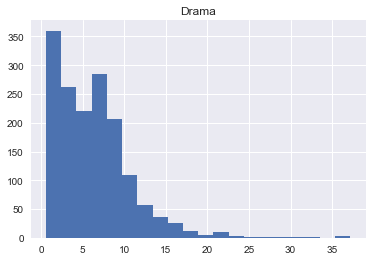

mean
6.332871955028108
std
4.528651486835705


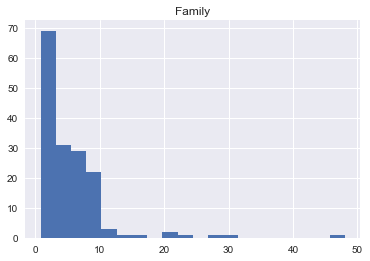

mean
5.513302469135803
std
5.663325926317125


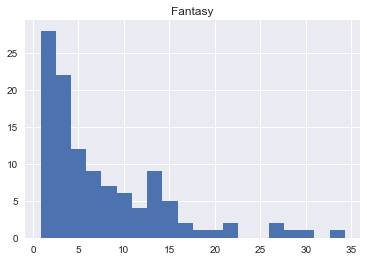

mean
7.640026548672566
std
6.909124492887465


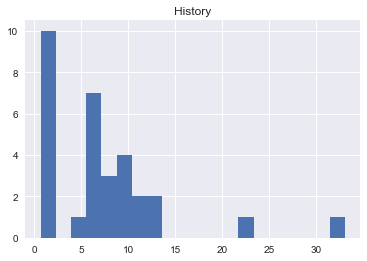

mean
7.291096774193549
std
6.767845247220313


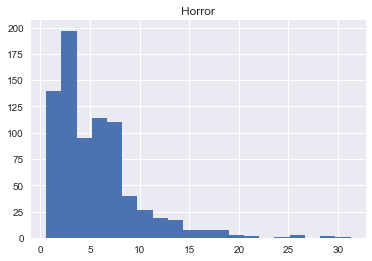

mean
5.60327307206068
std
4.261288721546013


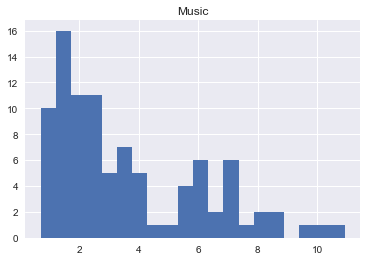

mean
3.6154731182795707
std
2.5056766576828053


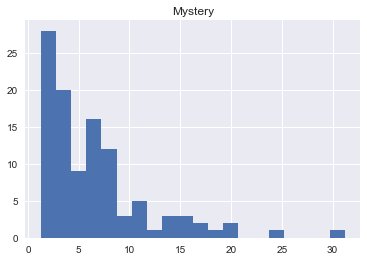

mean
6.476205607476636
std
5.369865255570863


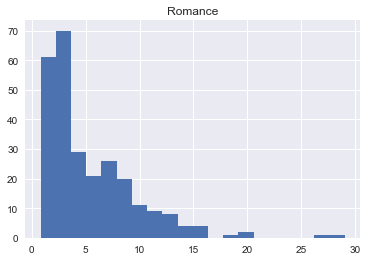

mean
5.390589552238806
std
4.313676458365414


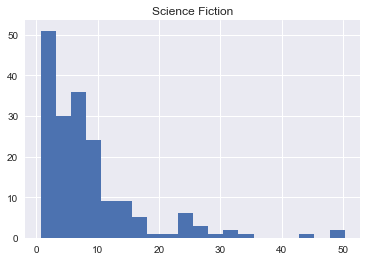

mean
8.5575
std
8.51884477989697


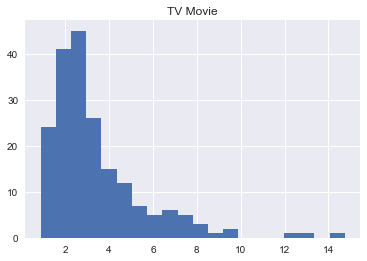

mean
3.407958974358975
std
2.2150766430059927


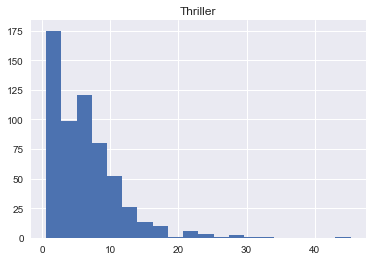

mean
6.388554054054051
std
5.080948522880966


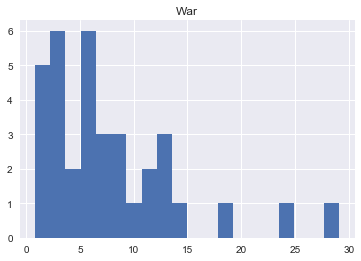

mean
7.797514285714287
std
6.391213068928072


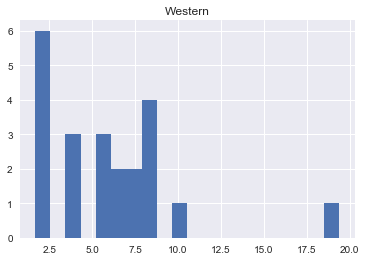

mean
5.998636363636362
std
3.9940548622201275


In [11]:
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].hist(bins=20)
    plt.title(genre)
    plt.show()
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].std())

### Histgrams of popularity by genre (Log)

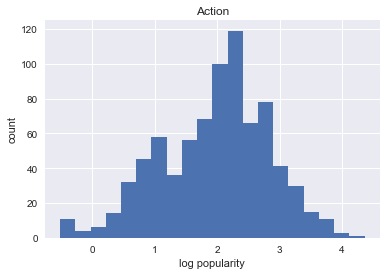

mean
1.969031279136505
std
0.8719432060019433


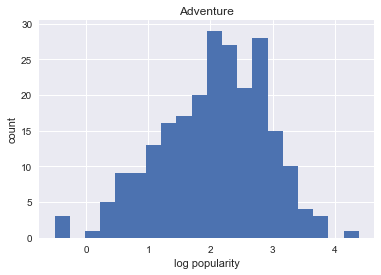

mean
2.052938941886282
std
0.8649790578722999


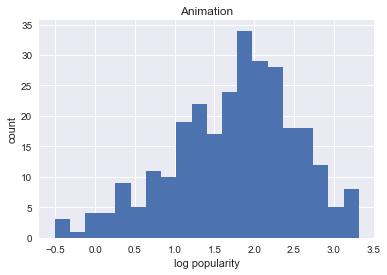

mean
1.7502980951933491
std
0.7849513572929304


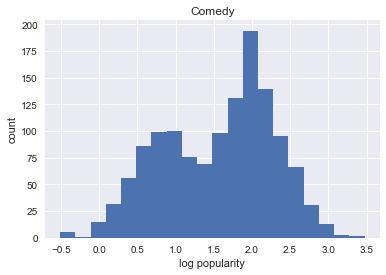

mean
1.5645644407448613
std
0.7251697252461927


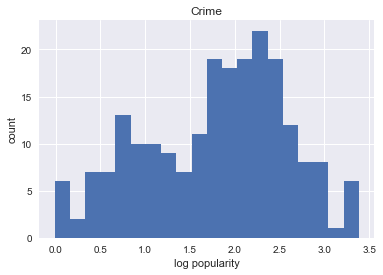

mean
1.7886132628077607
std
0.7947233920683496


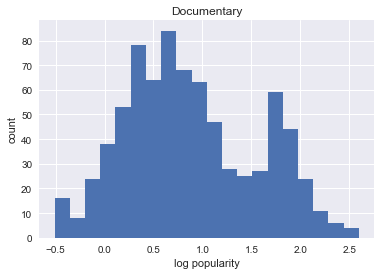

mean
0.8796967800974475
std
0.6718321505332001


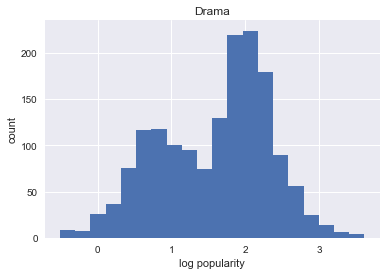

mean
1.589452661794308
std
0.7531231440470005


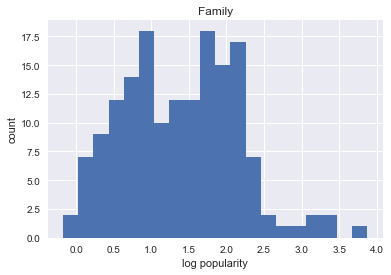

mean
1.3887890784268686
std
0.7707267263338209


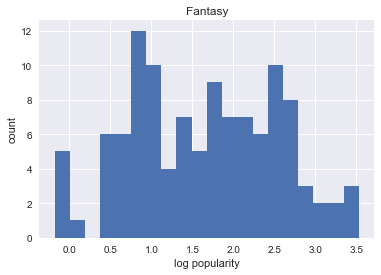

mean
1.6541489996747467
std
0.8951848619681355


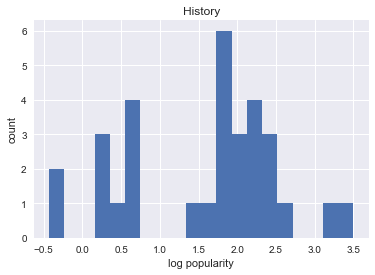

mean
1.5773392070803396
std
0.9932301119815582


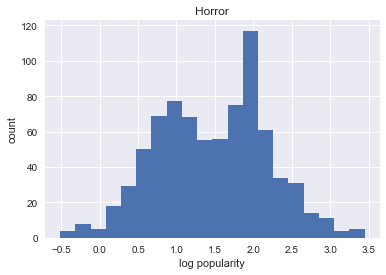

mean
1.4709519468968206
std
0.7218321094770448


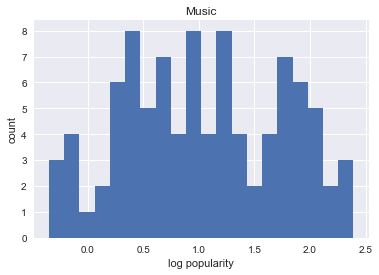

mean
1.0447607619622274
std
0.7107303527228057


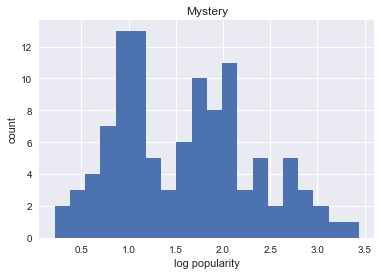

mean
1.592746437816591
std
0.7298776002458462


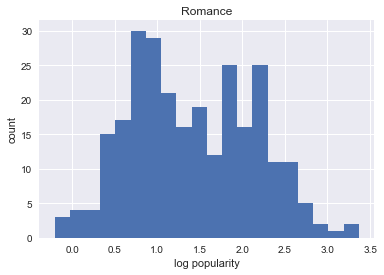

mean
1.4129976860074756
std
0.7339828658248702


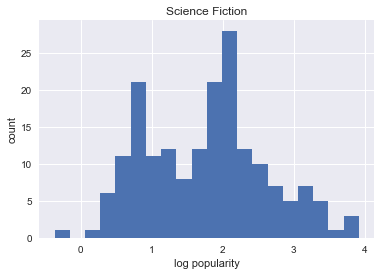

mean
1.7719502323595206
std
0.8599939209182895


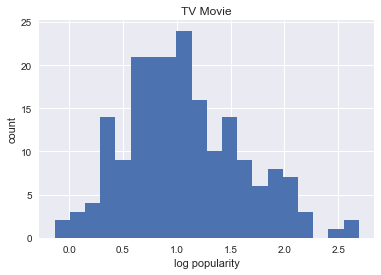

mean
1.06550566281072
std
0.5467299073386196


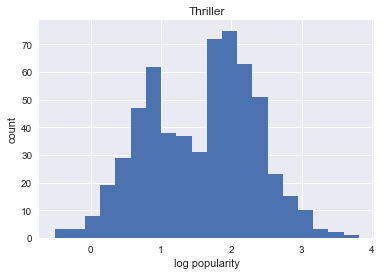

mean
1.5737766896657772
std
0.7695074082035558


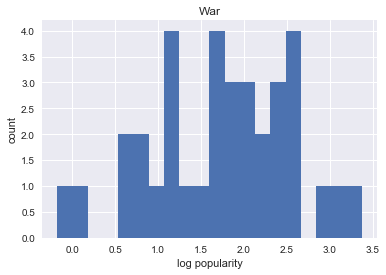

mean
1.7404995782012107
std
0.8391621028159743


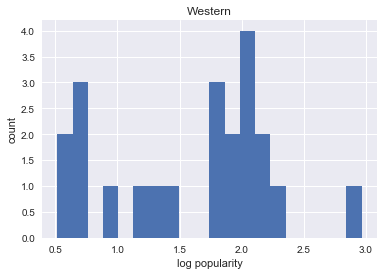

mean
1.5861494455974936
std
0.6771384700714775


In [12]:
boxplot = []
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('log popularity')
    plt.ylabel('count')
    plt.show()
    boxplot.append(df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'])
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].std())

### Comparing popularity by genre

In [13]:
df_boxplot = pd.DataFrame(boxplot).T
df_boxplot.columns=list(tmdb_genre_dict.values())

<Figure size 864x216 with 0 Axes>

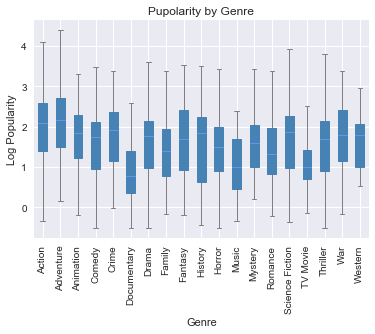

In [14]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")

plt.figure(figsize=(12,3))
df_boxplot.plot.box(color=props, patch_artist=True)

plt.title('Pupolarity by Genre')
plt.xlabel('Genre')
plt.ylabel('Log Popularity')
plt.xticks(rotation=90)
#plt.grid(False)
plt.show()

### Examining the relathionship between release month and popularity

Text(0.5, 1.0, 'Popularity of Movies by Release Month')

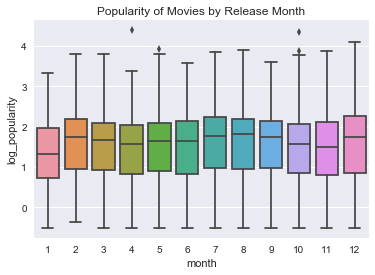

In [15]:
month = df_tmdb_movies_2009_2018.month
lpop = df_tmdb_movies_2009_2018.log_popularity
sns.boxplot(x = month, y = lpop)
plt.title("Popularity of Movies by Release Month")

### Examining the relathionship between release month and popularity by genre

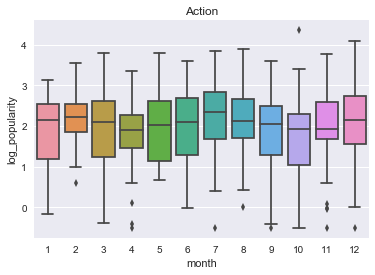

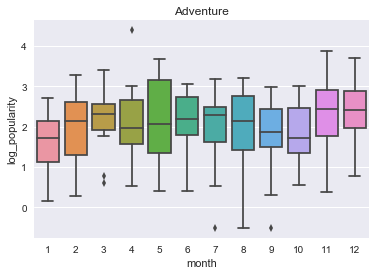

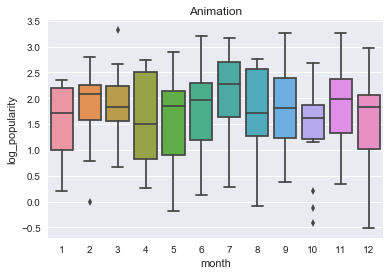

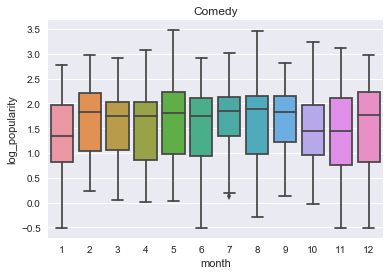

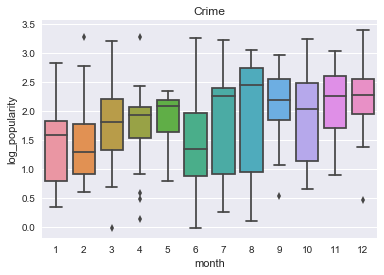

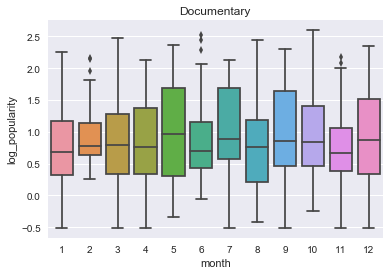

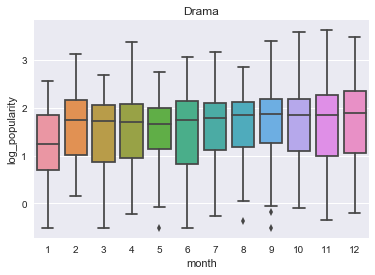

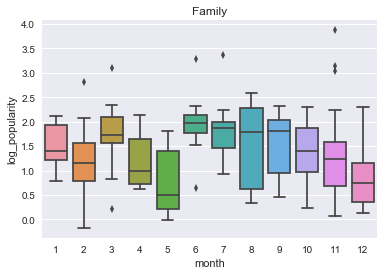

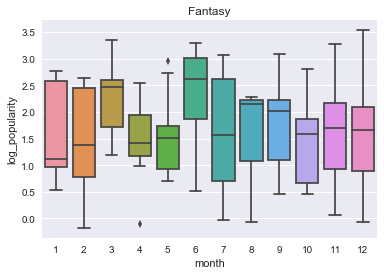

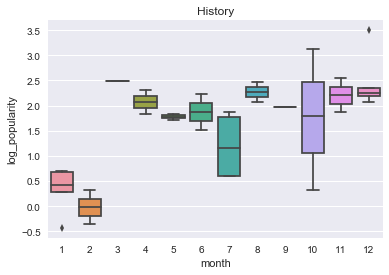

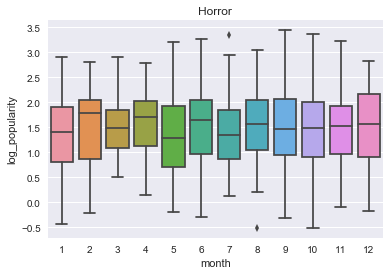

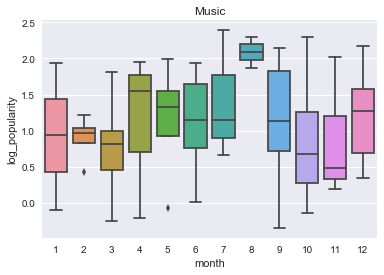

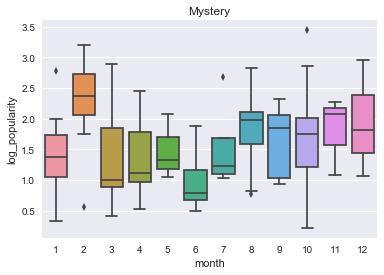

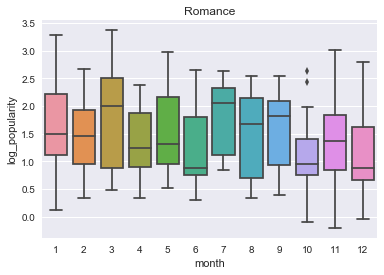

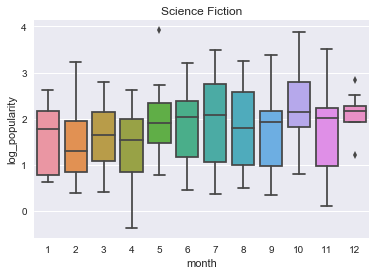

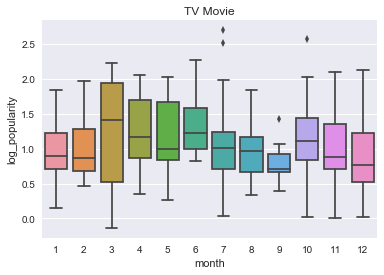

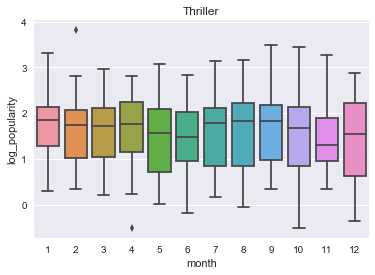

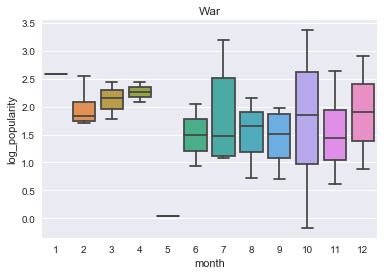

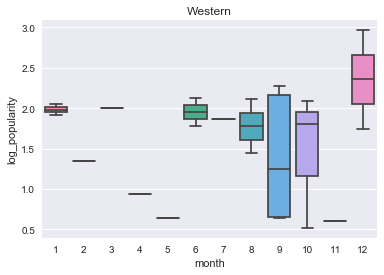

In [16]:
for genre in list(tmdb_genre_dict.values()):
    month = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'month']
    lpop = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity']
    sns.boxplot(x = month, y = lpop)
    plt.title(genre)
    plt.show()


### Movie genre in the market

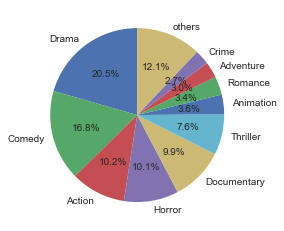

In [17]:
genre_share = df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum()*100/df_tmdb_movies_2009_2018[list(tmdb_genre_dict.values())].sum().sum()
genre_share = genre_share.sort_values(ascending=False)
genre_share_plot = genre_share[0:10]
genre_share_plot['others'] = 100-genre_share_plot.sum()

fig1, ax1 = plt.subplots()
ax1.pie(genre_share_plot, labels=list(genre_share_plot.index), autopct='%1.1f%%', startangle=90)
ax1.set_xticklabels(labels=list(genre_share_plot.index),fontdict={'fontsize': 20})

plt.show()

### Clean up the budget numbers

In [18]:
df_budget.production_budget = df_budget.production_budget.str.replace(',', '')
df_budget.production_budget = df_budget.production_budget.str.replace('$', '')
df_budget.production_budget = df_budget.production_budget.astype(int)

df_budget.domestic_gross = df_budget.domestic_gross.str.replace(',', '')
df_budget.domestic_gross = df_budget.domestic_gross.str.replace('$', '')
df_budget.domestic_gross = df_budget.domestic_gross.astype(int)

df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace(',', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace('$', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.astype(int)

### Merging TMDB and The Numbers datasets

In [19]:
df_budget.rename(columns={'movie':'title'}, inplace=True)

In [20]:
df_merged = pd.merge(df_tmdb_movies_2009_2018,df_budget,on="title")

In [21]:
df_merged = df_merged[df_merged.worldwide_gross != 0]

In [22]:
df_merged['log_worldwide'] = np.log(df_merged.worldwide_gross)
df_merged['log_budget'] = np.log(df_merged.production_budget)

### Distribution of global revenues

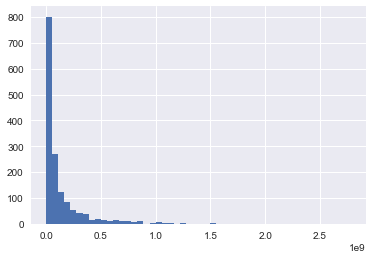

In [32]:
df_merged['worldwide_gross'].hist(bins=50)

### Distribution of global revenues (Log)

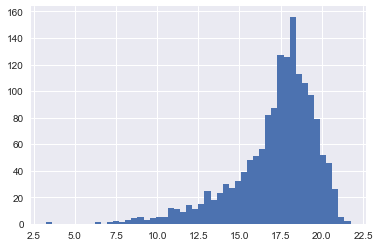

In [23]:
df_merged['log_worldwide'].hist(bins=50)

### Distribution of global revenues by genre

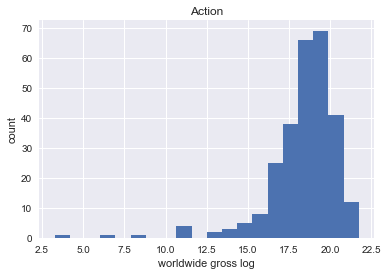

mean
18.385607811184283
std
2.2249422579666196


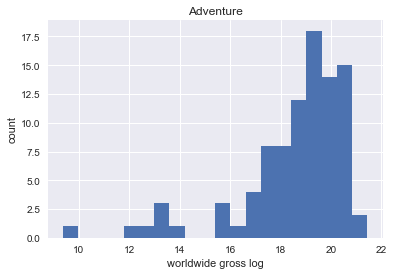

mean
18.523369779236283
std
2.1540174386022546


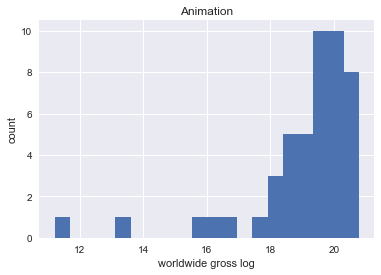

mean
19.05219540732195
std
1.830419350443693


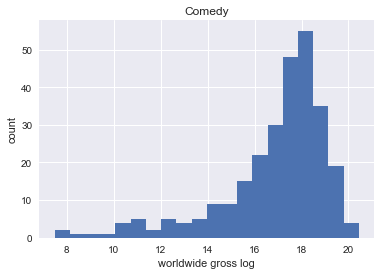

mean
16.86734490805347
std
2.3276822675145383


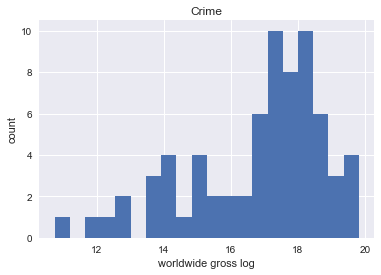

mean
16.808299558356804
std
2.0677066719722395


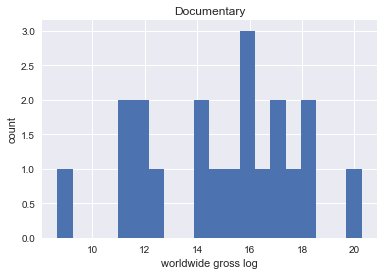

mean
14.953386292315145
std
2.944540034185276


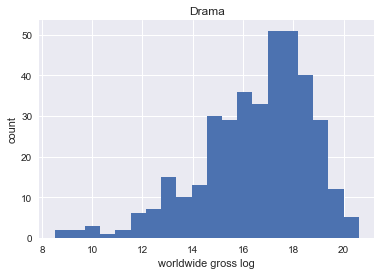

mean
16.50595579353302
std
2.186782952411175


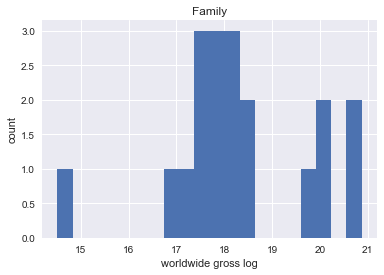

mean
18.331705778369123
std
1.4902234873040543


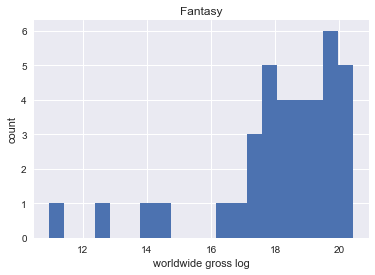

mean
18.13624806372606
std
2.1065728119880753


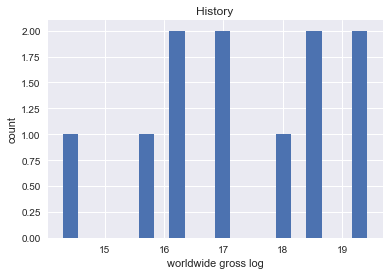

mean
17.283527363195823
std
1.6164496096350986


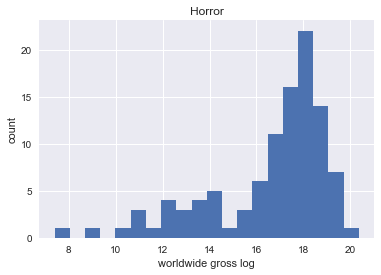

mean
16.59808745988653
std
2.563811186264255


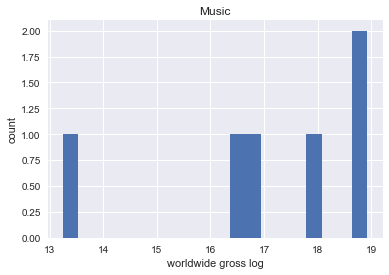

mean
17.0883237333997
std
2.1202382369515513


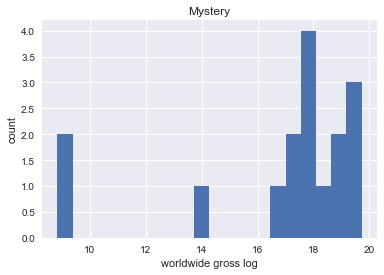

mean
16.82805392213999
std
3.3565230260478827


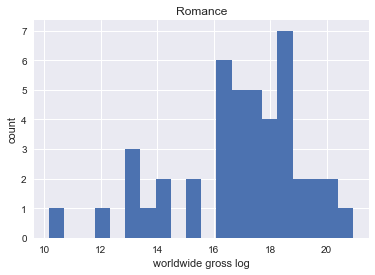

mean
16.910879169906902
std
2.3055256474872006


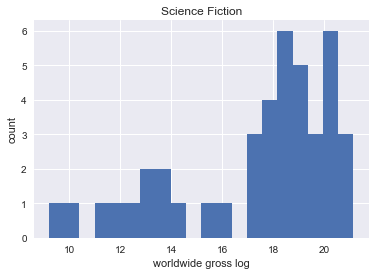

mean
17.29480382345674
std
3.20364901945967


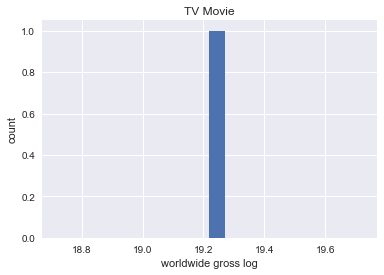

mean
19.219911925891214
std
nan


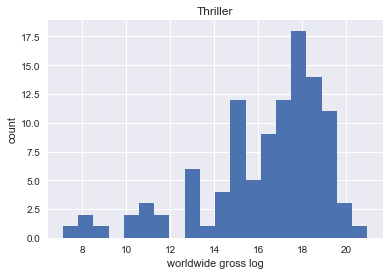

mean
16.30975721180521
std
2.8227261191833084


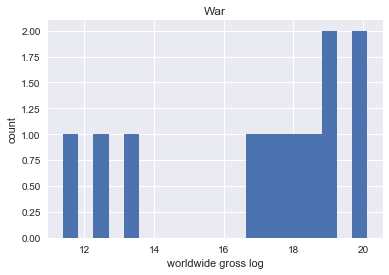

mean
17.004408650645015
std
2.9307655737057328


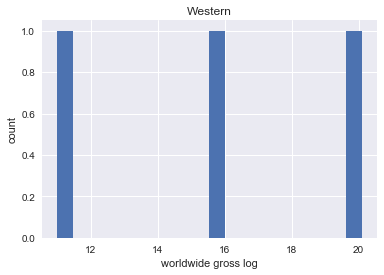

mean
15.670907246457928
std
4.553634118192527


In [24]:
for genre in list(tmdb_genre_dict.values()):
    df_merged.loc[df_merged[genre]==1, 'log_worldwide'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('worldwide gross log')
    plt.ylabel('count')
    plt.show()
    print('mean')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].mean())
    print('std')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].std())

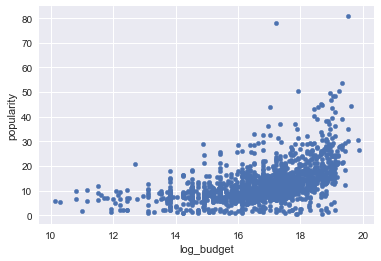

In [25]:
df_merged.plot.scatter("log_budget","popularity")

### Examining relathinship between production budget and global revenue

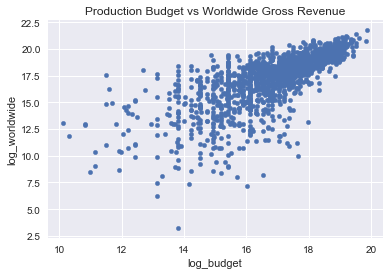

In [26]:
df_merged.plot.scatter("log_budget","log_worldwide")
plt.title("Production Budget vs Worldwide Gross Revenue")

plt.show()

### Examining relathinship between production budget and global revenue by genre

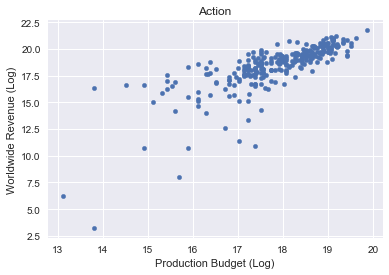

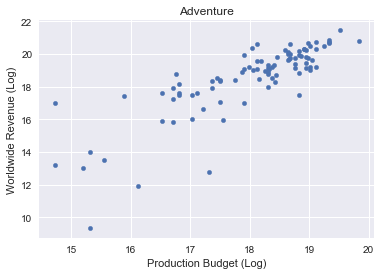

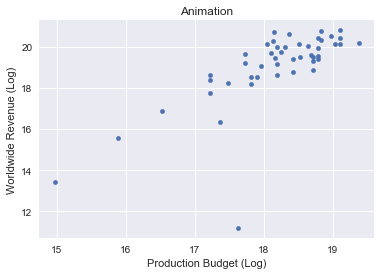

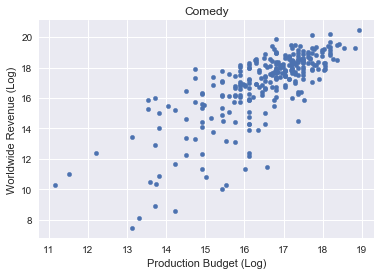

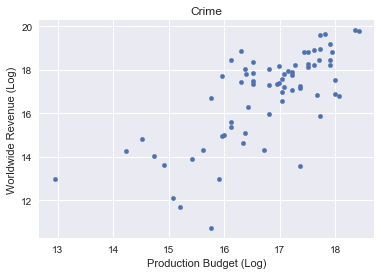

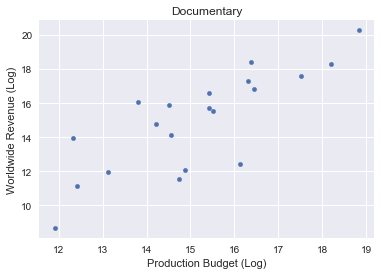

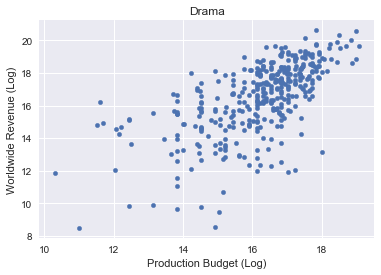

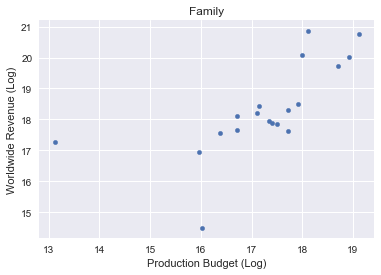

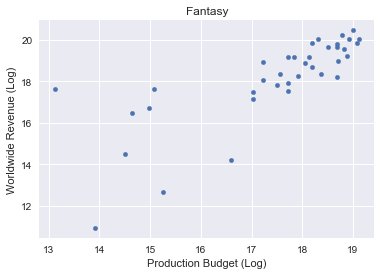

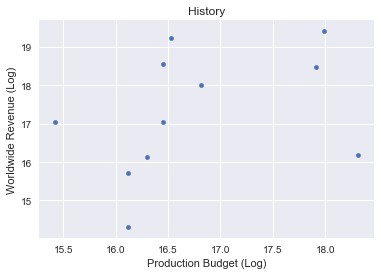

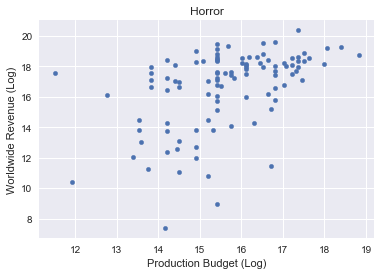

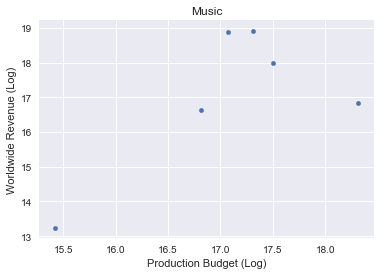

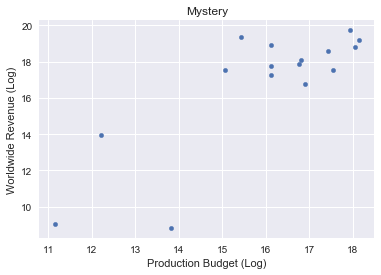

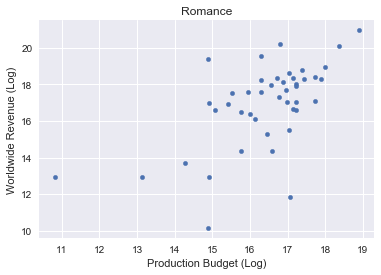

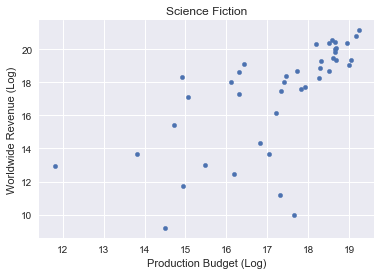

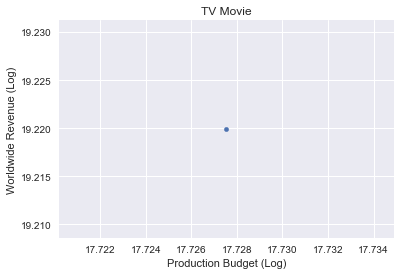

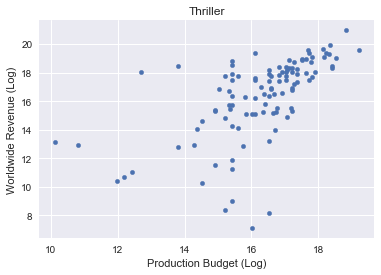

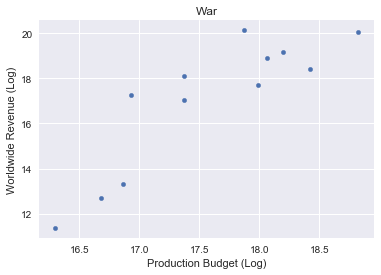

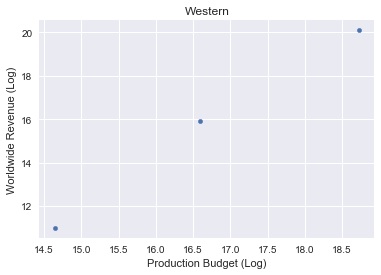

In [27]:
for genre in list(tmdb_genre_dict.values()):
    df_merged.loc[df_merged[genre]==1].plot.scatter("log_budget","log_worldwide")
    plt.title(genre)
    plt.xlabel('Production Budget (Log)')
    plt.ylabel('Worldwide Revenue (Log)')
    plt.show()
    

### Using thresholds for production budget

In [28]:
revenue_by_budget = df_merged.loc[df_merged.log_budget > 10, 'log_worldwide']

for i in list(range(11,20)):
    revenue_by_budget = pd.concat([revenue_by_budget, df_merged.loc[df_merged.log_budget > i, 'log_worldwide']],axis=1)
revenue_by_budget.columns=list(range(10,20))
revenue_by_budget.describe()

,10,11,12,13,14,15,16,17,18,19
count,1560.000000,1556.000000,1544.000000,1527.000000,1472.000000,1362.000000,1172.000000,777.000000,323.000000,62.000000
mean,17.193041,17.204554,17.244469,17.286046,17.430885,17.664425,18.008249,18.606735,19.591677,20.315174
std,2.486785,2.479450,2.432975,2.404198,2.245266,2.062517,1.791750,1.475209,0.852200,0.635592
min,3.258097,3.258097,3.258097,3.258097,7.124478,7.124478,7.124478,10.010277,16.171771,19.008733
25%,16.131694,16.154290,16.202506,16.278965,16.496101,16.831020,17.266004,17.936559,19.092758,19.832194
50%,17.762170,17.775255,17.797260,17.811952,17.904773,18.020886,18.227742,18.755935,19.628108,20.429864
75%,18.869327,18.870834,18.882619,18.891116,18.925052,19.003559,19.179693,19.554179,20.237171,20.785208
max,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401,21.744401


### Examining distribution of revenues by threshold

<Figure size 576x288 with 0 Axes>

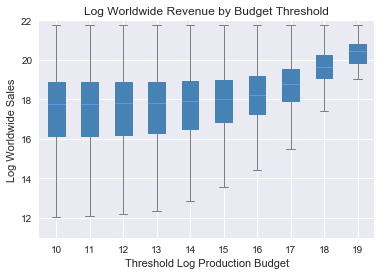

In [29]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")
plt.figure(figsize=(8,4))
revenue_by_budget.plot.box(color=props, patch_artist=True)

plt.title('Log Worldwide Revenue by Budget Threshold')
plt.xlabel('Threshold Log Production Budget')
plt.ylabel('Log Worldwide Sales')
#plt.grid(False)
plt.ylim(11,22)
plt.show()


### Examining distribution of revenues by threshold by genre

In [30]:
revenue_by_budget_genre = pd.concat([revenue_by_budget,df_merged[list(tmdb_genre_dict.values())]],axis=1)

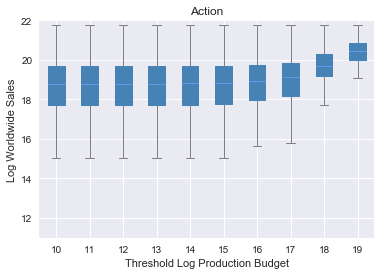

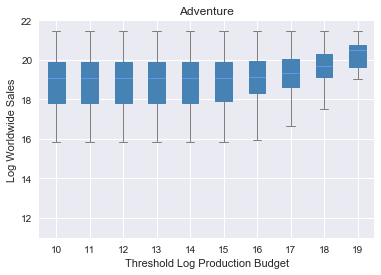

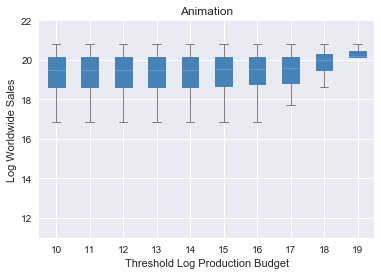

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


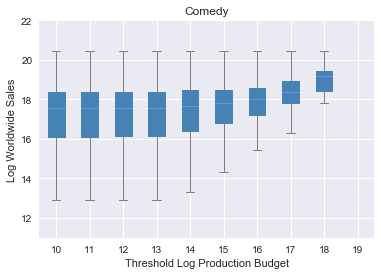

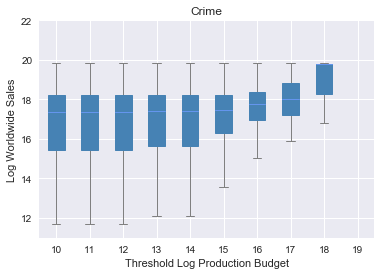

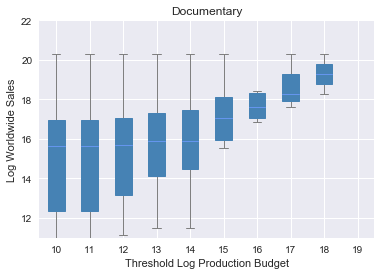

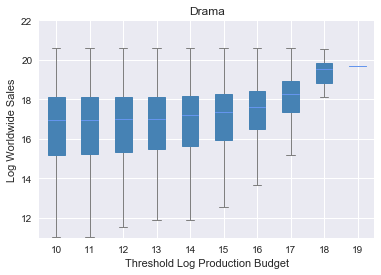

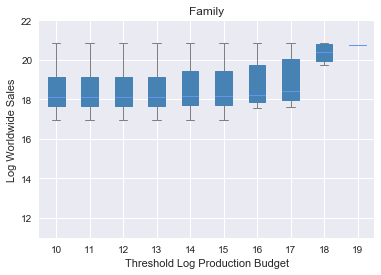

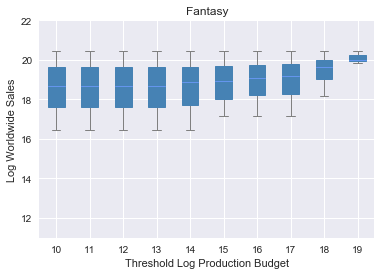

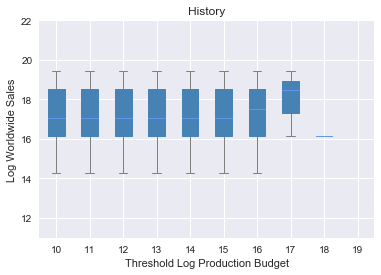

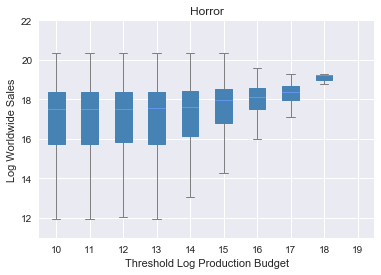

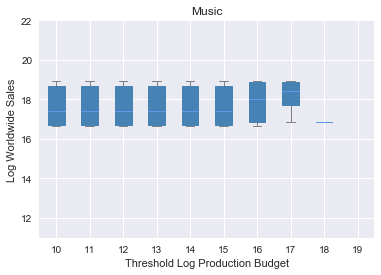

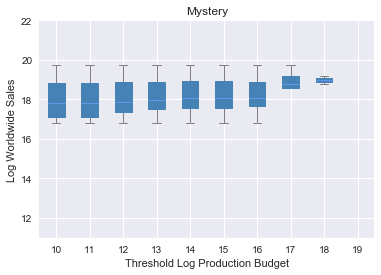

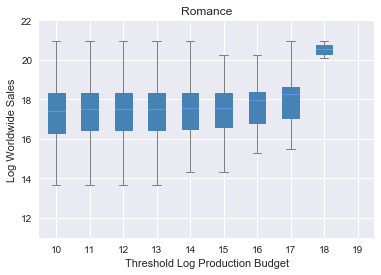

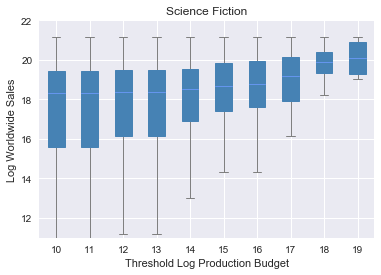

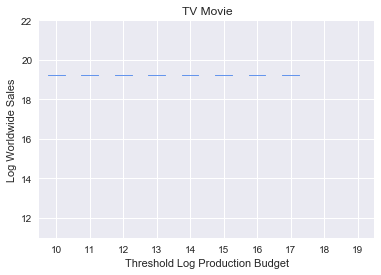

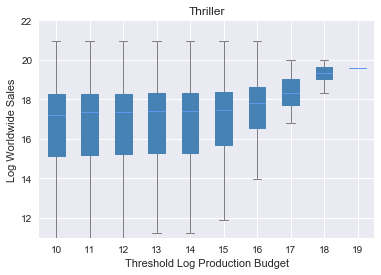

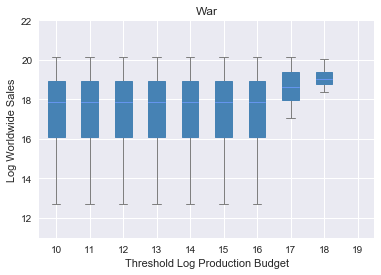

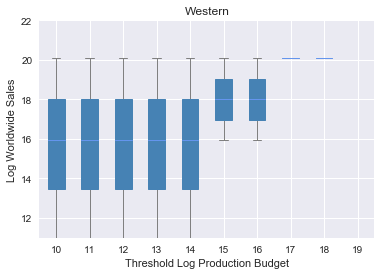

In [31]:
props = dict(boxes="steelblue", whiskers="gray", medians="cornflowerBlue", caps="Gray")
for genre in list(tmdb_genre_dict.values()):
    revenue_by_budget_genre.loc[revenue_by_budget_genre[genre]==1, list(range(10,20))].plot.box(color=props, patch_artist=True)

    plt.title(genre)
    plt.xlabel('Threshold Log Production Budget')
    plt.ylabel('Log Worldwide Sales')
    plt.ylim(11,22)
    plt.show()